Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [454]:
# 1. Import the libraries
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries
import phik
from scipy.stats import pearsonr
from scipy.stats import zscore

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report,accuracy_score, plot_roc_curve

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
# Checking for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# The last column has only null values and hence we drop it
df.drop(columns = ['_c39'], inplace = True)

In [10]:
# we check for the statistical summary of the dataset
df.describe().round()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,204.0,39.0,546239.0,1136.0,1256.0,1101000.0,501214.0,25126.0,-26794.0,12.0,2.0,1.0,1.0,52762.0,7433.0,7400.0,37929.0,2005.0
std,115.0,9.0,257063.0,612.0,244.0,2297407.0,71702.0,27872.0,28104.0,7.0,1.0,1.0,1.0,26402.0,4881.0,4825.0,18886.0,6.0
min,0.0,19.0,100804.0,500.0,433.0,-1000000.0,430104.0,0.0,-111100.0,0.0,1.0,0.0,0.0,100.0,0.0,0.0,70.0,1995.0
25%,116.0,32.0,335980.0,500.0,1090.0,0.0,448404.0,0.0,-51500.0,6.0,1.0,0.0,1.0,41812.0,4295.0,4445.0,30292.0,2000.0
50%,200.0,38.0,533135.0,1000.0,1257.0,0.0,466446.0,0.0,-23250.0,12.0,1.0,1.0,1.0,58055.0,6775.0,6750.0,42100.0,2005.0
75%,276.0,44.0,759100.0,2000.0,1416.0,0.0,603251.0,51025.0,0.0,17.0,3.0,2.0,2.0,70592.0,11305.0,10885.0,50822.0,2010.0
max,479.0,64.0,999435.0,2000.0,2048.0,10000000.0,620962.0,100500.0,0.0,23.0,4.0,2.0,3.0,114920.0,21450.0,23670.0,79560.0,2015.0


In [30]:
high_variance_list = []
for col in df.columns[:-1]:
    if(df[col].unique().shape[0]/len(df)>0.90):
        high_variance_list.append(col)

In [31]:
# Checking the high variance in the selected features
for col in high_variance_list:
    print(f"{col} : {df[col].unique().shape[0]/len(df)*100:0.3f}")

policy_number : 100.000
policy_bind_date : 95.100
policy_annual_premium : 99.100
insured_zip : 99.500
incident_location : 100.000


The features listed above show a high variance or each data point in the feature is unique and hence doesn't assist in the generalizing the dataset. Hence we drop these features.

In [32]:
df.drop(columns = high_variance_list, inplace = True)

In [33]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [43]:
from pandas.api.types import is_numeric_dtype
numeric_features = [col for col in df.columns[:-1] if is_numeric_dtype(df[col])]
categorical_features = [col for col in df.columns[:-1]  if not (is_numeric_dtype(df[col]))]

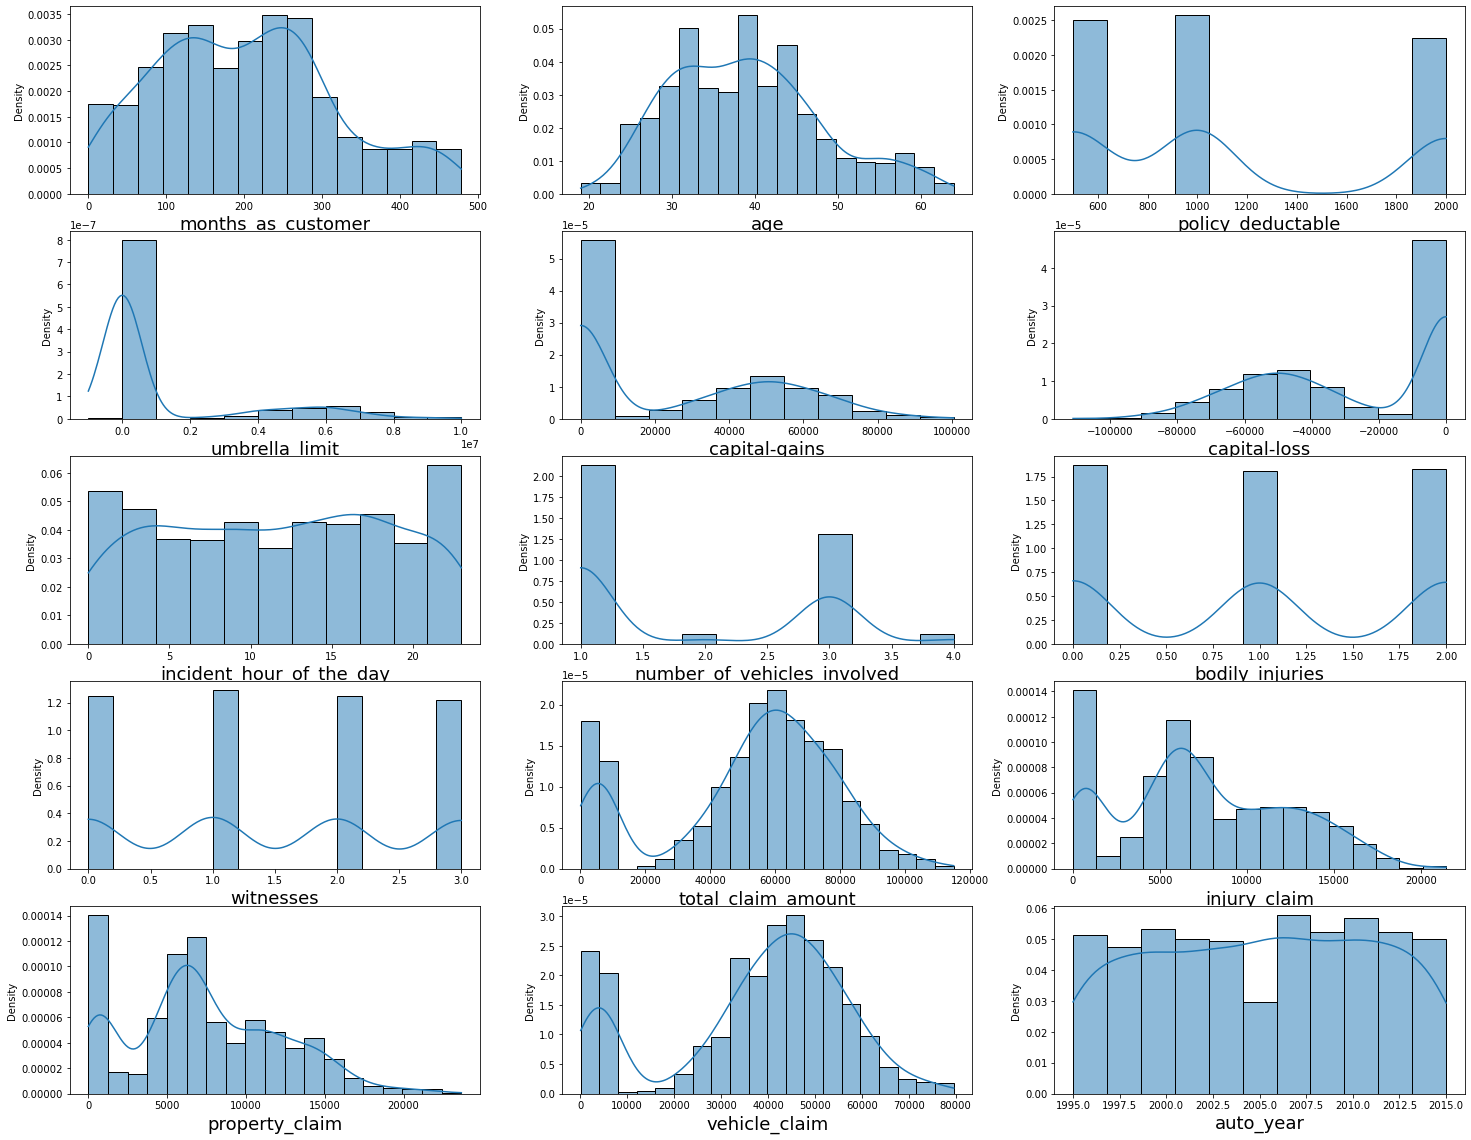

In [46]:
# We plot a histogram of the numerical features
plt.figure(figsize = (25,20))
plotnumber = 1

for col in numeric_features:
    if(plotnumber < 16):
        plt.subplot(5,3,plotnumber)
        sns.histplot(df[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()


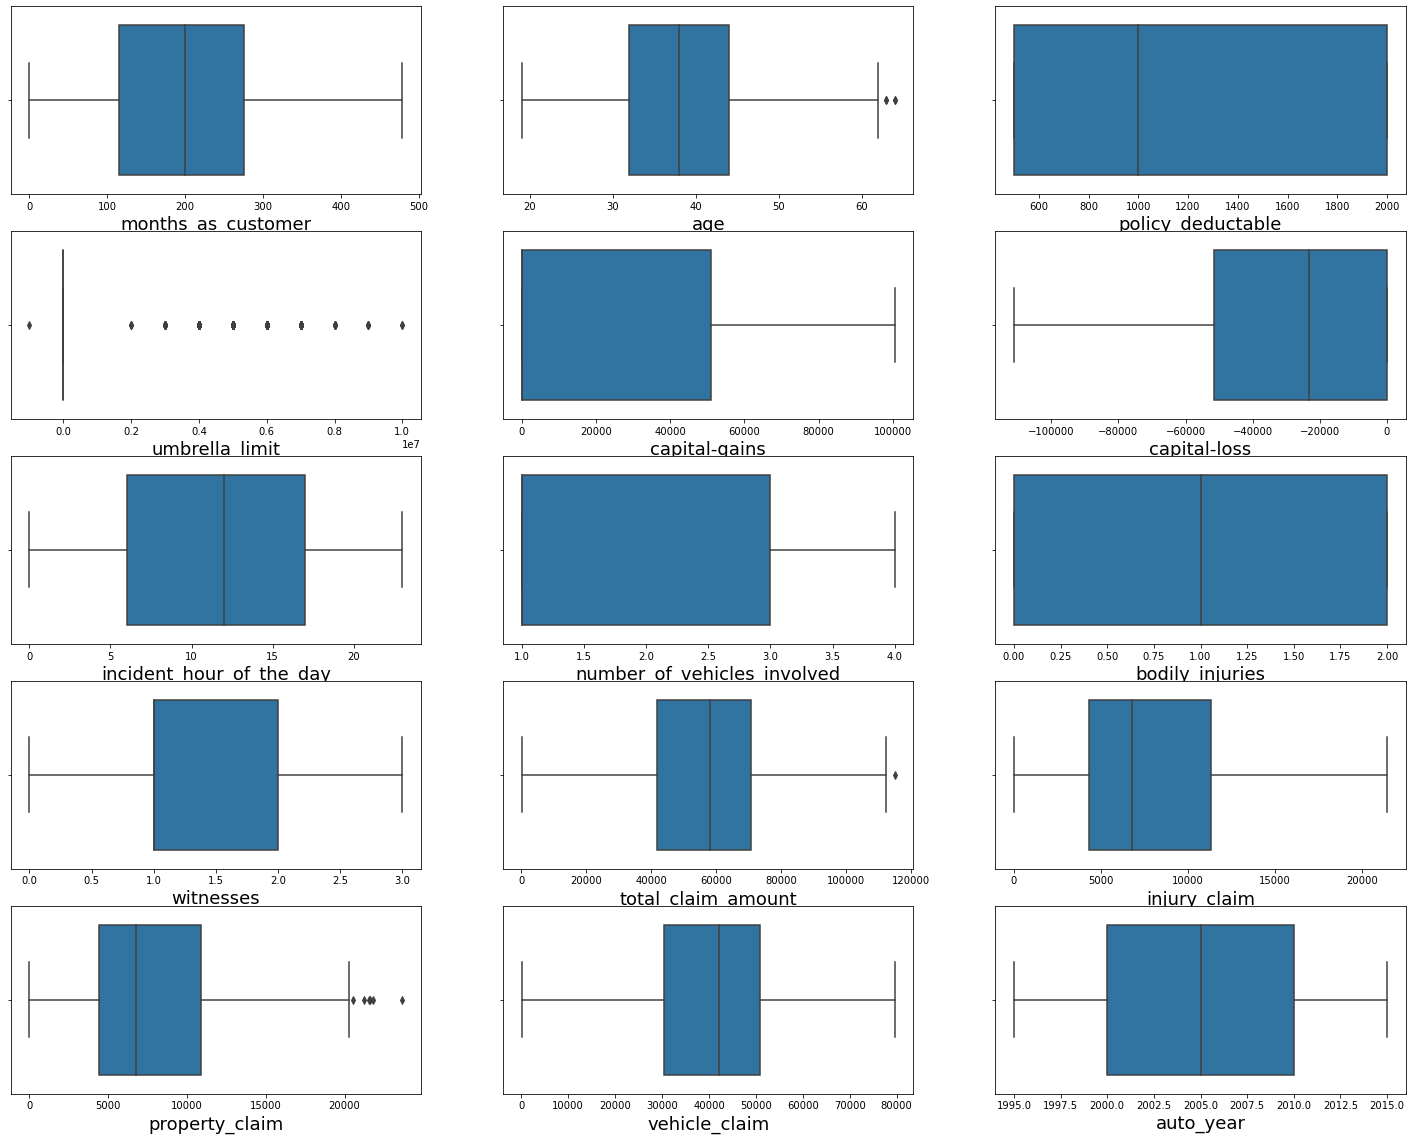

In [55]:
# most of the features are normally distributed however, some seem to have outliers
# we check for outliers using the boxplot
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in numeric_features:
    if plotnumber<16:
        plt.subplot(5,3,plotnumber)
        sns.boxplot(df[col], orient = 'h')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

'months as customer' and 'property claim' have some outliers 

In [56]:
# attempting to remove the outliers
from scipy.stats import zscore

In [58]:
test = df[(np.abs(zscore(df[numeric_features]))<3).all(axis = 1)]

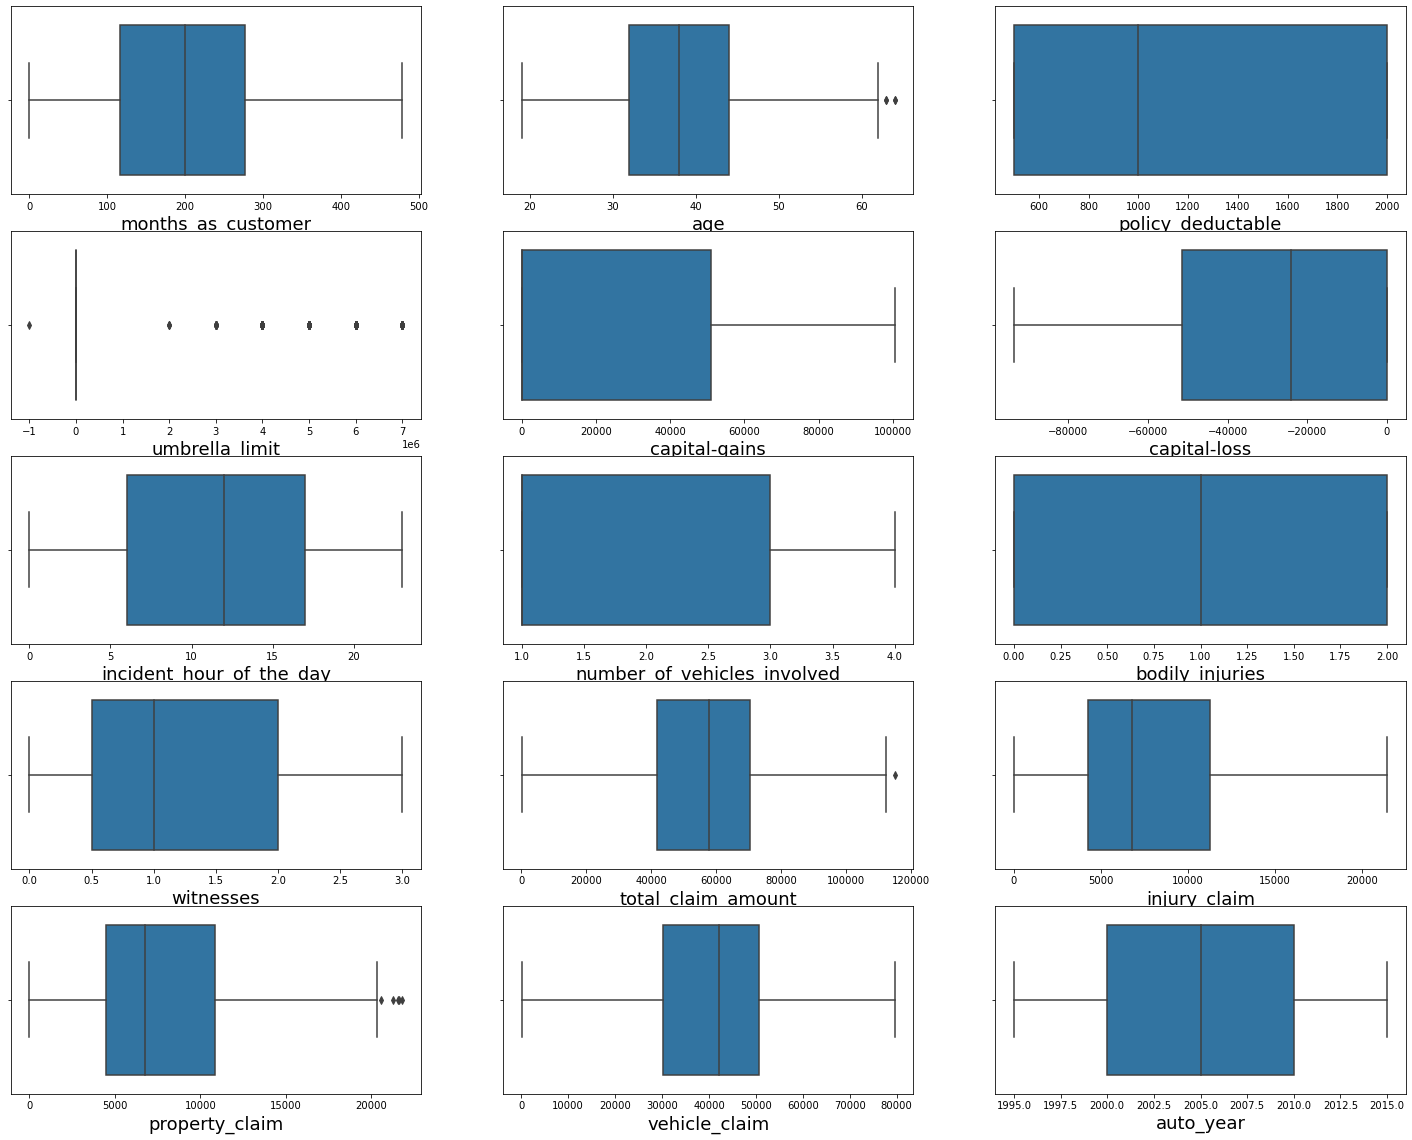

In [64]:
# checking the altered dataset
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in numeric_features:
    if(plotnumber<16):
        plt.subplot(5,3,plotnumber)
        sns.boxplot(test[col], orient = 'h')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()


In [92]:
# We can attempt using the interquantile range to remove some the outliers from the 
# property_claim feature
q1 = df['property_claim'].quantile(0.25)
q3 = df['property_claim'].quantile(0.75)
iqr = q3 - q1

hi_threshold = q3 + 1.5 * iqr

indices = np.where(df['property_claim'] > hi_threshold)

In [93]:
test = df.drop(index = indices[0])

<AxesSubplot:xlabel='property_claim'>

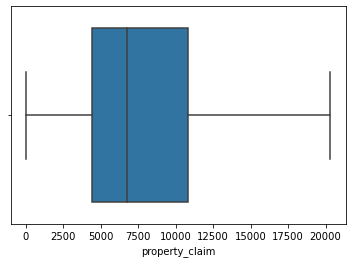

In [94]:
sns.boxplot(test['property_claim'], orient = 'h')

In [95]:
# attempting to remove the outlier from the 'age' feature
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1

hi_threshold = q3 + 1.5 * iqr
indices1 = np.where(df['age'] > hi_threshold)

In [96]:
test = df.drop(index = indices1[0])

<AxesSubplot:xlabel='age'>

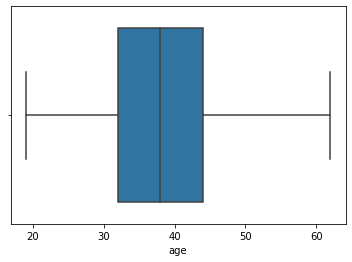

In [97]:
sns.boxplot(test['age'], orient = 'h')

In [98]:
# removing the outliers from the 'total_claim_amount' feature
q1 = df['total_claim_amount'].quantile(0.25)
q3 = df['total_claim_amount'].quantile(0.75)

iqr = q3 - q1

hi_threshold = q3 + 1.5 * iqr

indices2 = np.where(df['total_claim_amount'] > hi_threshold)
test = df.drop(index = indices2[0])

<AxesSubplot:xlabel='total_claim_amount'>

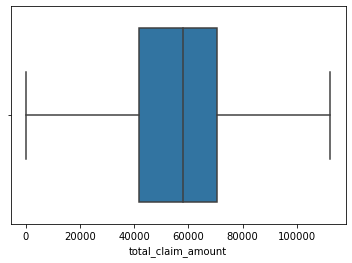

In [99]:
sns.boxplot(test['total_claim_amount'], orient = 'h')

In [113]:
total_indices = indices[0].shape[0] + indices1[0].shape[0] + indices2[0].shape[0]

In [115]:
print(f"Total datapoints lost : {total_indices}")

Total datapoints lost : 11


In [120]:
# Since not too many datapoints are lost with the removal of the outlier points
# we can remove them from the dataset

df.drop(index = indices[0], inplace = True)

In [121]:
df.drop(index = indices1[0], inplace = True)

In [122]:
df.drop(index = indices2[0], inplace = True)

In [127]:
# The final column is the target variable and we encode it 
df['fraud_reported'] = pd.get_dummies(df['fraud_reported'], drop_first = True)

now we use phik to check for the strength of the correlation of the numerical and categorical features with the target variable

In [128]:
import phik

In [144]:
y = df['fraud_reported']


In [149]:
temp = pd.DataFrame()
feature= []
pvalue = []
score  = []

for col in df.columns[:-1]:
    if (is_numeric_dtype(df[col])):
        score.append(phik.phik_from_array(df[col],y, [col]))
        pvalue.append(phik.significance.significance_from_array(df[col], y, [col])[0])
        feature.append(col)
    else:
        score.append(phik.phik_from_array(df[col],y))
        pvalue.append(phik.significance.significance_from_array(df[col],y)[0])
        feature.append(col)

In [150]:
temp = pd.DataFrame()
temp['features'] = features
temp['score'] = score
temp['pvalue'] = pvalue

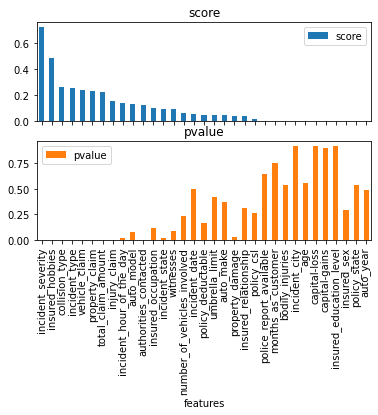

In [160]:
temp.set_index('features', inplace = True)
temp.sort_values('score', ascending = False).plot.bar(subplots = True)
plt.show()

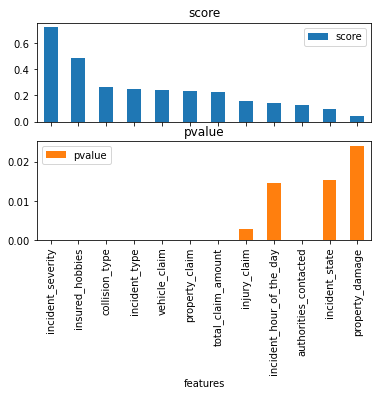

In [164]:
temp[temp['pvalue'] < 0.05].sort_values('score', ascending = False).plot.bar(subplots = True)
plt.show()

In [165]:
temp[temp['pvalue']<0.05].shape

(12, 2)

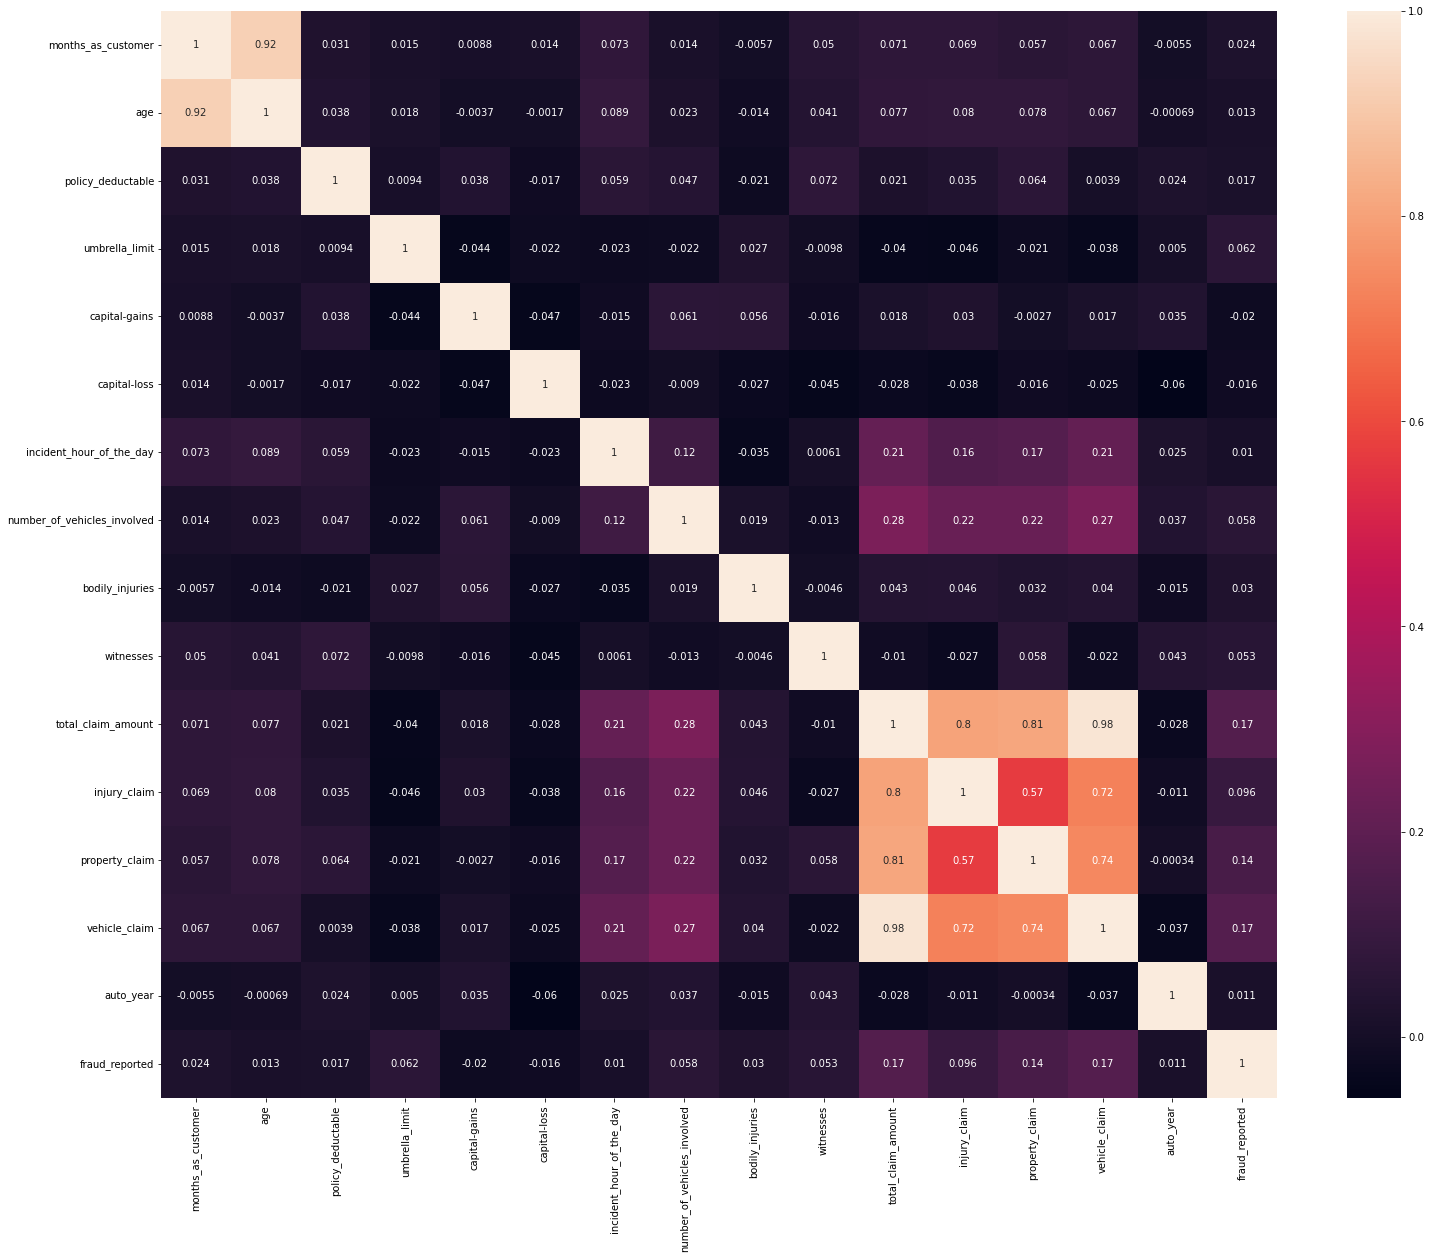

In [167]:
# only 12 features show high correlation value with the target variable 
# and are statistically significant

# Hence we will use the heatmap to check for correlations between two features and drop any
# that dont correlate 
plt.figure(figsize = (25, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

From the heatmap above 'month_as_customer' and 'age' correlate with each quite strong. The following features are seen to correlate with each other 
  * total_claim_amount
  * injury_claim
  * property_claim
  * vehicle_claim

In [182]:
print(f"Missing values in 'police_report_availble':{np.where(df['police_report_available'] == '?')[0].shape[0]/len(df)*100:0.3f}%")

Missing values in 'police_report_availble':34.176%


In [184]:
# Since 34% of the data is missing in the feature 'police_report_available' 
# its best to drop the feature 

df.drop('police_report_available', inplace = True, axis = 1)

In [202]:
categorical_features.remove('police_report_available')

In [204]:
df[categorical_features]

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,auto_make,auto_model
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,Saab,92x
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,Mercedes,E400
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,Dodge,RAM
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,Chevrolet,Tahoe
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,Accura,RSX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,YES,Honda,Accord
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,YES,Volkswagen,Passat
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,?,Suburu,Impreza
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,?,Audi,A5


In [214]:
df = pd.concat([df, pd.get_dummies(df['policy_state'], drop_first = True)], axis = 1)

In [215]:
df.drop('policy_state', inplace = True, axis = 1)

In [219]:
df = pd.concat([df, pd.get_dummies(df['insured_sex'], drop_first = True)], axis = 1)

In [221]:
df.drop('insured_sex', inplace = True, axis = 1)

In [226]:
# removing the dropped features from the categorical_features list
categorical_features.remove('insured_sex')
categorical_features.remove('policy_state')

In [236]:
# Checking for missing values 
print(f"Collision_Type : {np.where(df['collision_type'] == '?')[0].shape[0]/len(df)*100:0.3f}%")
print(f"Property_Damage: {np.where(df['property_damage'] == '?')[0].shape[0]/len(df)*100:0.3f}%")

Collision_Type : 17.897%
Property_Damage: 36.097%


In [238]:
# A signifcant amount of data would be lost hence we drop the features
df.drop(columns = ['collision_type', 'property_damage'], inplace = True)

In [240]:
# Dropping the columns from the categorical_features list
categorical_features.remove('property_damage')

In [241]:
categorical_features.remove('collision_type')

In [243]:
df[categorical_features]

,policy_csl,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model
0,250/500,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Major Damage,Police,SC,Columbus,Saab,92x
1,250/500,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,Minor Damage,Police,VA,Riverwood,Mercedes,E400
2,100/300,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,Dodge,RAM
3,250/500,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Major Damage,Police,OH,Arlington,Chevrolet,Tahoe
4,500/1000,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,Minor Damage,None,NY,Arlington,Accura,RSX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,Minor Damage,Fire,NC,Northbrook,Honda,Accord
996,100/300,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,Major Damage,Fire,SC,Northbend,Volkswagen,Passat
997,250/500,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,Minor Damage,Police,NC,Arlington,Suburu,Impreza
998,500/1000,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,Major Damage,Other,NY,Arlington,Audi,A5


In [247]:
# We drop the date and the policy_csl as they seem to not correlate great with the target variable
df.drop(columns = ['incident_date', 'policy_csl'], inplace = True)

In [248]:
# removing from the categorical_features list
categorical_features.remove('incident_date')
categorical_features.remove('policy_csl')

In [250]:
# All the remaining categorical features are non-binary and hence we use 
# label encoder to encode the values

In [251]:
from sklearn.preprocessing import LabelEncoder

In [261]:
df[categorical_features].head()

,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model
0,4,craft-repair,sleeping,husband,Single Vehicle Collision,Major Damage,Police,SC,Columbus,Saab,92x
1,4,machine-op-inspct,reading,other-relative,Vehicle Theft,Minor Damage,Police,VA,Riverwood,Mercedes,E400
2,6,sales,board-games,own-child,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,Dodge,RAM
3,6,armed-forces,board-games,unmarried,Single Vehicle Collision,Major Damage,Police,OH,Arlington,Chevrolet,Tahoe
4,0,sales,board-games,unmarried,Vehicle Theft,Minor Damage,None,NY,Arlington,Accura,RSX


In [260]:
df.loc[:,'insured_education_level'] = LabelEncoder().fit_transform(df['insured_education_level'])

In [264]:
df.loc[:,'insured_occupation']= LabelEncoder().fit_transform(df['insured_occupation'])

In [268]:
df.loc[:,'insured_hobbies'] = LabelEncoder().fit_transform(df['insured_hobbies'])

In [276]:
# We drop insured_relationship as it has a very low correlation score with the target_variable
df.drop(columns = ['insured_relationship'], inplace = True)

In [277]:
# removing the column from the categorical features list
categorical_features.remove('insured_relationship')

In [327]:
df[categorical_features].head()

,insured_education_level,insured_occupation,insured_hobbies,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,auto_make,auto_model
0,4,2,17,2,1.0,Police,SC,Columbus,Saab,92x
1,4,6,15,3,2.0,Police,VA,Riverwood,Mercedes,E400
2,6,11,2,0,2.0,Police,NY,Columbus,Dodge,RAM
3,6,1,2,2,1.0,Police,OH,Arlington,Chevrolet,Tahoe
4,0,11,2,3,2.0,None,NY,Arlington,Accura,RSX


In [283]:
df['incident_type'] = LabelEncoder().fit_transform(df['incident_type'])

In [287]:
# For the incident severity we use the OrdinalEncoder
temp_list = ['Total Loss', 'Major Damage', 'Minor Damage', 'Trivial Damage']

In [290]:
from sklearn.preprocessing import OrdinalEncoder

In [318]:
oe = OrdinalEncoder(categories = [temp_list])

In [322]:
df.loc[:,'incident_severity'] = oe.fit_transform(df[['incident_severity']])

In [325]:
df['authorities_contacted'].unique().shape
(df['incident_state'].unique().shape)

(7,)

In [333]:
# The incident_city doesn't correlate strongly with the target variable and hence we drop it 
df.drop('incident_city', inplace = True, axis = 1)

In [334]:
# removing it from our categorical list
categorical_features.remove('incident_city')

In [336]:
# Encoding the 'authorities_contacted' and 'incident_state' features
df['authorities_contacted'] = LabelEncoder().fit_transform(df['authorities_contacted'])

In [339]:
df['incident_state'] = LabelEncoder().fit_transform(df['incident_state'])

In [340]:
df['t'] = df['auto_make'] + ' ' + df['auto_model']

In [343]:
df['t'].value_counts()

Dodge RAM              43
Jeep Wrangler          42
Accura MDX             36
Audi A3                36
Volkswagen Jetta       35
Dodge Neon             35
Volkswagen Passat      33
Audi A5                32
Nissan Pathfinder      31
Suburu Legacy          31
Chevrolet Malibu       30
Saab 92x               28
Suburu Forrestor       28
Toyota Camry           28
Mercedes E400          27
Ford F150              27
Saab 95                26
Saab 93                25
Jeep Grand Cherokee    25
Ford Escape            24
Chevrolet Tahoe        24
Nissan Maxima          24
Nissan Ultima          23
BMW X5                 23
Chevrolet Silverado    22
Toyota Highlander      22
Honda Civic            22
Ford Fusion            21
Toyota Corolla         20
Suburu Impreza         20
Accura TL              19
Mercedes ML350         19
BMW 3 Series           18
Mercedes C300          18
Honda CRV              17
BMW M5                 15
BMW X6                 15
Honda Accord           13
Accura RSX  

In [346]:
# There are quite a lot of categories, hence we will LabelEncode it 
df['auto'] = LabelEncoder().fit_transform(df['t'])

In [347]:
# we drop the auto_make, auto_model and t columns
df.drop(columns = ['auto_make', 'auto_model', 't'],inplace = True)

In [349]:
# removing the dropped columns from the list
categorical_features.remove('auto_make')
categorical_features.remove('auto_model')


In [352]:
df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,IN,OH,MALE,auto
0,328,48,1000,0,4,2,17,53300,0,2,...,71610,6510,13020,52080,2004,1,0,1,1,28
1,228,42,2000,5000000,4,6,15,0,0,3,...,5070,780,780,3510,2007,1,1,0,1,23
2,134,29,2000,5000000,6,11,2,35100,0,0,...,34650,7700,3850,23100,2007,0,0,1,0,13
3,256,41,2000,6000000,6,1,2,48900,-62400,2,...,63400,6340,6340,50720,2014,1,0,0,0,11
4,228,44,1000,6000000,0,11,2,66000,-46000,3,...,6500,1300,650,4550,2009,0,0,0,1,1


In [354]:
# The auto_year feature is found to have the lowest correlation coefficient and hence we drop it 
df.drop('auto_year', axis = 1, inplace = True)

In [355]:
df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,...,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,IN,OH,MALE,auto
0,328,48,1000,0,4,2,17,53300,0,2,...,2,71610,6510,13020,52080,1,0,1,1,28
1,228,42,2000,5000000,4,6,15,0,0,3,...,0,5070,780,780,3510,1,1,0,1,23
2,134,29,2000,5000000,6,11,2,35100,0,0,...,3,34650,7700,3850,23100,0,0,1,0,13
3,256,41,2000,6000000,6,1,2,48900,-62400,2,...,2,63400,6340,6340,50720,1,0,0,0,11
4,228,44,1000,6000000,0,11,2,66000,-46000,3,...,1,6500,1300,650,4550,0,0,0,1,1


In [356]:
# confirming is there are any missing values
np.where(df.values == '?')

(array([], dtype=int64),)

In [363]:
# Select the best features using SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif



In [366]:
numeric_features.remove('auto_year')

In [368]:
from sklearn.decomposition import PCA

df[numeric_features] = StandardScaler().fit_transform(df[numeric_features])

In [369]:
pca = PCA(random_state = 42)

In [373]:
df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,...,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,IN,OH,MALE,auto
0,1.096532,1.015360,-0.225036,-0.479602,4,2,17,1.010921,0.956719,2,...,0.465399,0.726714,-0.186123,1.214046,0.758091,1,0,1,1,28
1,0.217379,0.348861,1.411439,1.696209,4,6,15,-0.899483,0.956719,3,...,-1.336087,-1.809493,-1.362985,-1.390999,-1.822538,1,1,0,1,23
2,-0.609025,-1.095218,1.411439,1.696209,6,11,2,0.358588,0.956719,0,...,1.366142,-0.682036,0.058287,-0.737610,-0.781679,0,0,1,0,13
3,0.463542,0.237778,1.411439,2.131371,6,1,2,0.853214,-1.267157,2,...,0.465399,0.413786,-0.221038,-0.207661,0.685831,1,0,0,0,11
4,0.217379,0.571028,-0.225036,2.131371,0,11,2,1.466120,-0.682677,3,...,-0.435344,-1.754988,-1.256184,-1.418667,-1.767281,0,0,0,1,1


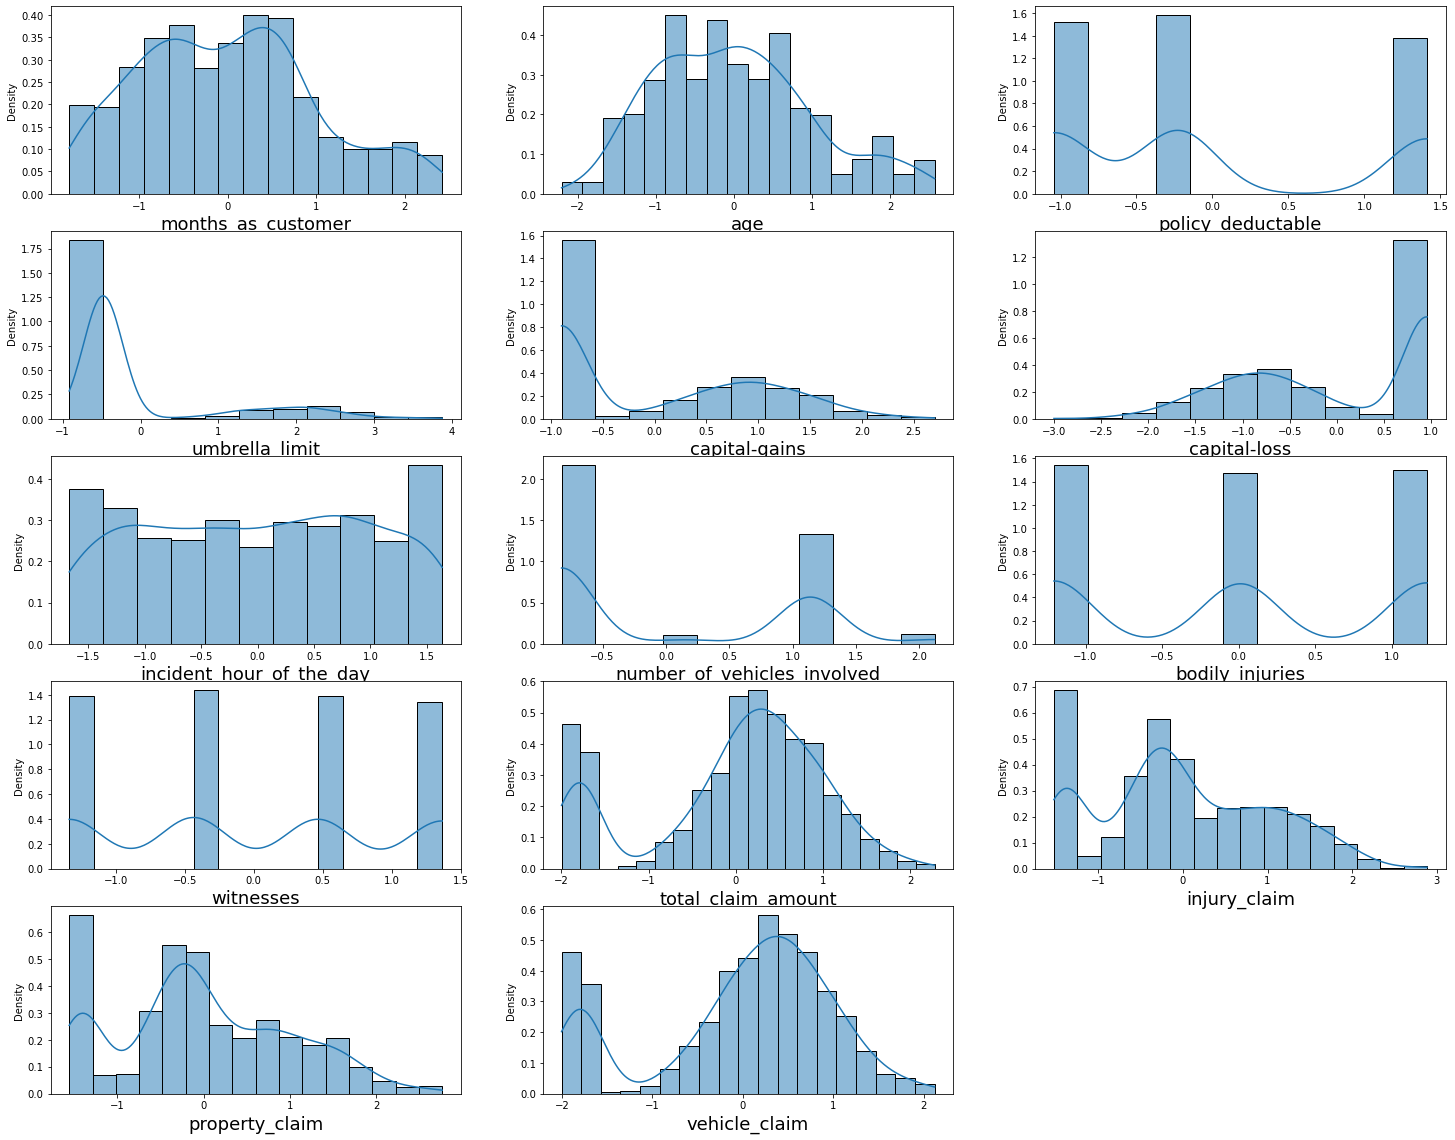

In [376]:
# plotting a histogram for the numeric features to check the distribution of the numeric features
plt.figure(figsize = (25, 20))
plotnumber = 1
for col in numeric_features:
    if plotnumber < 16:
        plt.subplot(5,3, plotnumber)
        sns.histplot(df[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()
    
    

In [377]:
# Normalizing the respective features
numeric_features.remove('policy_deductable')
numeric_features.remove('number_of_vehicles_involved')
numeric_features.remove('bodily_injuries')
numeric_features.remove('witnesses')

In [378]:
from sklearn.preprocessing import MinMaxScaler

In [380]:
df[numeric_features] = MinMaxScaler().fit_transform(df[numeric_features])

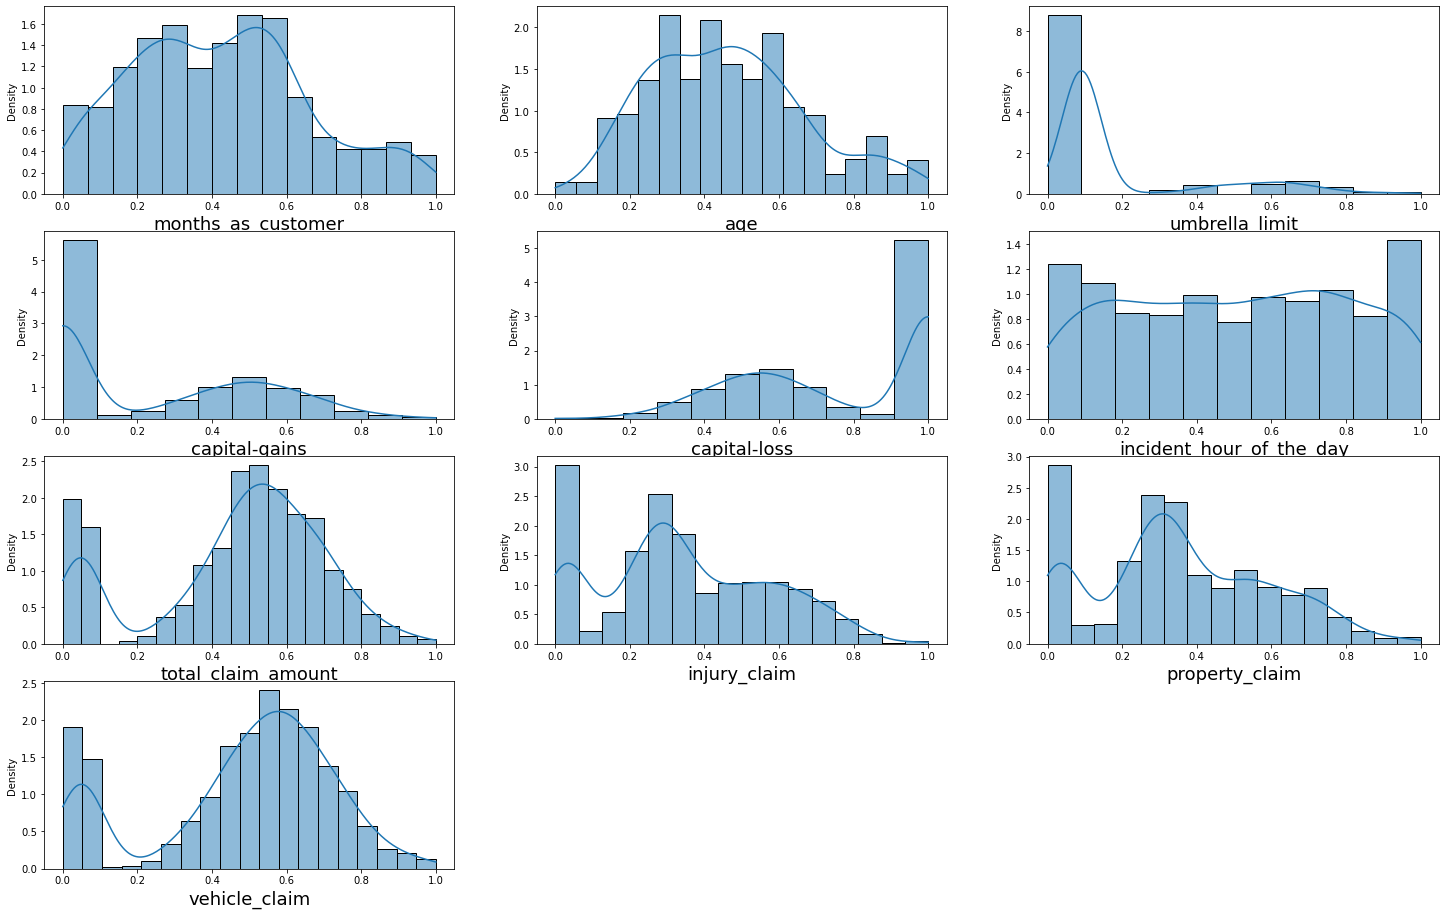

In [381]:
plt.figure(figsize = (25, 20))
plotnumber = 1
for col in numeric_features:
    if plotnumber < 16:
        plt.subplot(5,3, plotnumber)
        sns.histplot(df[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

In [385]:
# Performing a Power Transformation to make the data more gaussian
from sklearn.preprocessing import PowerTransformer
df1[numeric_features] = PowerTransformer().fit_transform(df[numeric_features])

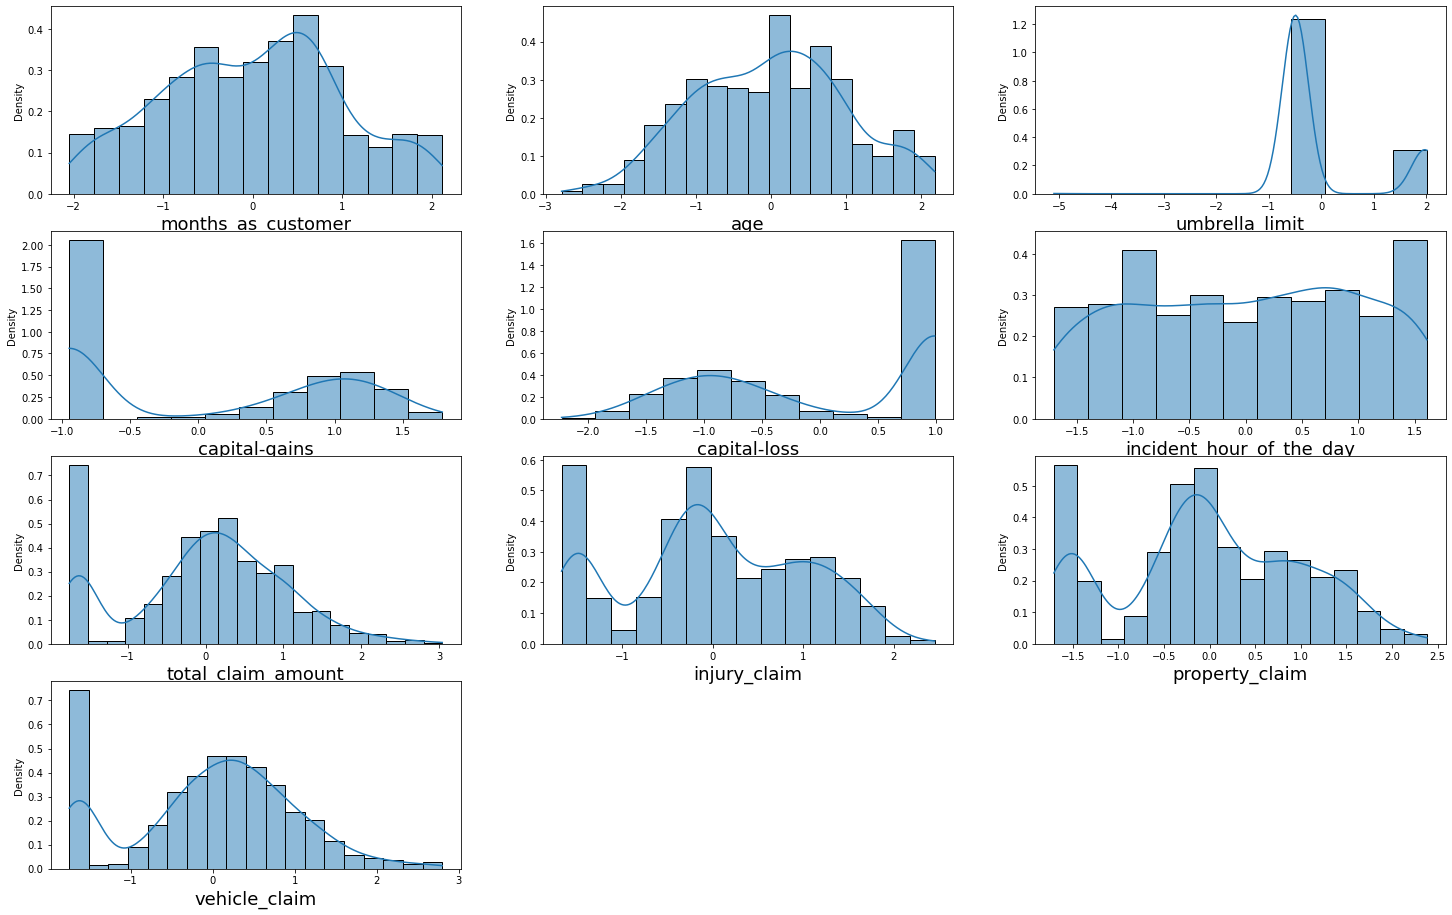

In [387]:
plt.figure(figsize = (25, 20))
plotnumber = 1
for col in numeric_features:
    if plotnumber < 16:
        plt.subplot(5,3, plotnumber)
        sns.histplot(df1[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

In [389]:
x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

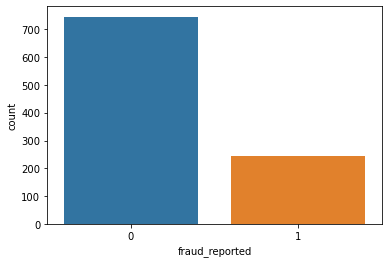

In [396]:
sns.countplot(y)
plt.show()

In [392]:
from imblearn.over_sampling import RandomOverSampler

In [393]:
ros = RandomOverSampler(random_state = 0)

In [394]:
x_resampled, y_resampled = ros.fit_resample(x,y)

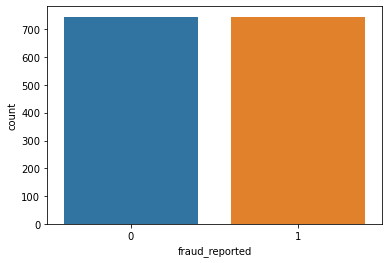

In [397]:
sns.countplot(y_resampled)
plt.show()

The classes have been over sampled to compensate for the class imbalance

In [401]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 42)

In [403]:
temp = pca.fit_transform(x)

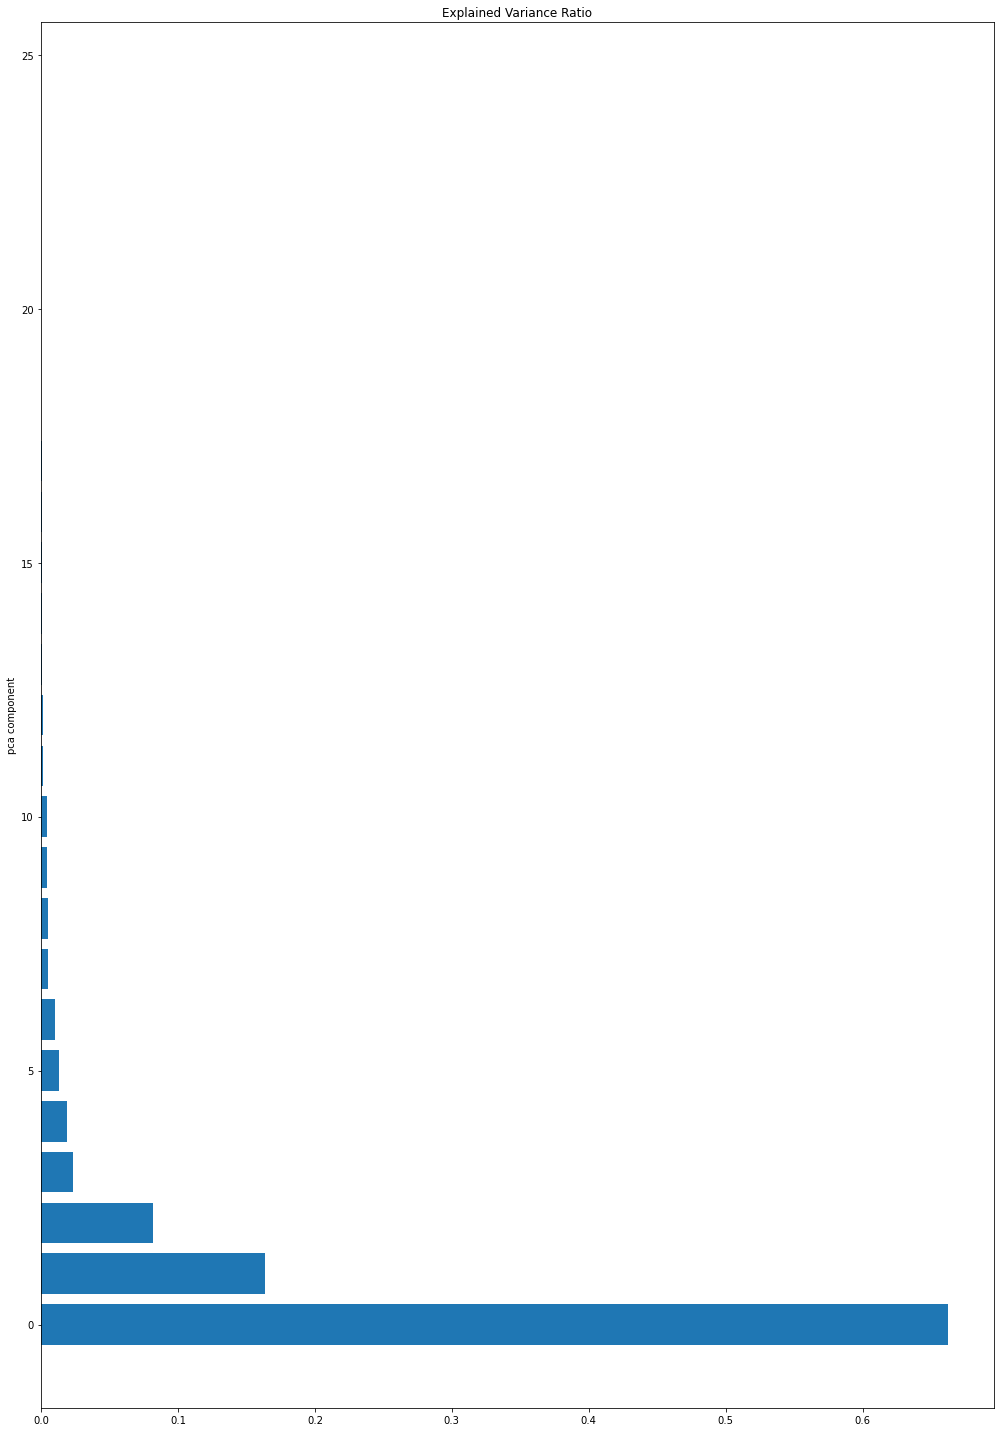

In [447]:
plt.figure(figsize = (14, 20))
idx = pca.explained_variance_ratio_.argsort()[::-1]
ticks = range(pca.n_components_)
# f, ax = plt.subplots(1,1)

plt.barh(ticks, pca.explained_variance_ratio_[idx])
plt.title('Explained Variance Ratio')
plt.ylabel('pca component')
plt.yticks

# comp_idx = abs(pca.components_[0]).argsort()[::-1]
# ax[1].barh(ticks, abs(pca.components_[0, comp_idx]))
# plt.yticks(ticks, np.array(x.columns)[comp_idx])
# ax[1].set_title('PCA dim-0 components')

plt.tight_layout()


In [432]:
pca_df = pd.DataFrame()
pca_df['Explained variance ratio'] = pca.explained_variance_ratio_[idx]
pca_df['pca components'] = abs(pca.components_[0, comp_idx])
pca_df['features'] = x.columns[comp_idx]

In [433]:
pca_df

,Explained variance ratio,pca components,features
0,6.623909e-01,0.999702,auto
1,1.634331e-01,0.014397,insured_occupation
2,8.188201e-02,0.014227,incident_state
3,2.349022e-02,0.009427,insured_education_level
4,1.928359e-02,0.005207,insured_hobbies
5,1.301818e-02,0.004883,authorities_contacted
6,1.016245e-02,0.004037,incident_type
7,5.468001e-03,0.002942,policy_deductable
8,5.076923e-03,0.002648,bodily_injuries
9,4.733116e-03,0.001852,number_of_vehicles_involved


We dont any columns from here as pca should have been applied only on the continuous features, interpretation of results of the pca at this stage could lead to misestimations

In [449]:
# Splitting the dataset into a training and test dataset

xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [452]:
# Building our Logistic regressor models
dt = DecisionTreeClassifier()
lr = LogisticRegression()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()

estimators = []
estimators.append((dt, 'DecisionTreeClassifier'))
estimators.append((lr, 'LogisticRegression'))
estimators.append((kn, 'KNeighborsClassifier'))
estimators.append((rf, 'RandomForestClassifier'))

for estimator in estimators:
    estimator[0].fit(xtrain, ytrain)
    ypred = estimator[0].predict(xtest)
    print()
    print(f"{estimator[1]} : {accuracy_score(ytest, ypred)*100:0.3f}%")


DecisionTreeClassifier : 77.778%

LogisticRegression : 75.758%

KNeighborsClassifier : 72.222%

RandomForestClassifier : 77.273%


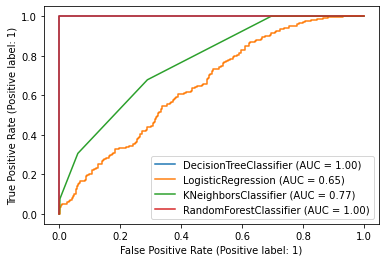

In [455]:
axis = plot_roc_curve(dt, xtrain, ytrain)
for estimator in estimators[1:]:
    plot_roc_curve(estimator[0], xtrain, ytrain, ax = axis.ax_)

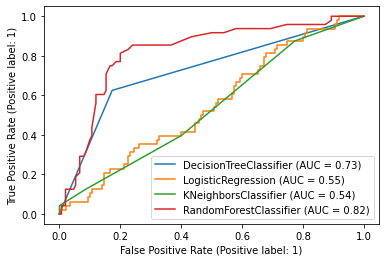

In [456]:
axis = plot_roc_curve(dt, xtest, ytest)
for estimator in estimators[1:]:
    plot_roc_curve(estimator[0], xtest, ytest, ax = axis.ax_)

The ROC plots for the test data show the models were possibly overfitting. However on the test data set the RandomForestEstimator gives the best results and hence we hyptertune this model for better paramters

In [457]:
param_grid = {'n_estimators':[100, 150, 200, 300],
              'criterion' :['gini','entropy'],
              'max_depth' :[2, 3, 4, 5, 6, 7],
              'min_samples_split': [2, 4, 5, 6, 8]}

gs1 = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, n_jobs = -1)
gs1.fit(xtrain, ytrain)
rf_best_est = gs1.best_estimator_

In [458]:
rf_best_est.fit(xtrain, ytrain)
ytest = rf_best_est.predict(xtest)
print(f"{accuracy_score(ytest, ypred)*100:0.3f}%")

88.889%


The accuracy has impressively improved from 77% to 88.9%, hence we will save this model 

In [ ]:
import joblib
joblib.dum